In [19]:
%run ./Utility
%matplotlib inline

In [10]:
for player in os.listdir('logs'):
    print('logs/' + player)
    games = [i for i in os.listdir('logs/' + player) if '.csv' in i]
    player_total = pd.DataFrame()
    
    if not games:
        print(f"No data found in: {player}")
        print()
        continue
        
    for game in games:
        df = pd.read_csv('./logs/' + player + f"/{game}")
        player_total = pd.concat([player_total, df],sort=False).drop("Unnamed: 9", axis=1)
    
    print(f"Player: {player}")
    display(player_total.describe().loc[['mean','std','min'],['earnings','fares','tips','trips']])
    print("\n\n")

logs/RandomAgent_1
Player: RandomAgent_1


,earnings,fares,tips,trips
mean,1860.350000,1643.571250,216.77875,132.57500
std,379.387347,339.771662,49.06281,29.87602
min,1060.230000,937.000000,123.23000,68.00000





logs/AltMarkov30
Player: AltMarkov30


,earnings,fares,tips,trips
mean,3948.723625,3474.125000,474.598625,250.300000
std,120.869500,86.306324,49.472598,14.381247
min,3684.180000,3301.500000,355.680000,214.000000





logs/AdvancedGreedy
Player: AdvancedGreedy


,earnings,fares,tips,trips
mean,3396.536250,2994.103875,402.432375,250.012500
std,104.370475,89.584422,29.922422,15.051384
min,3063.080000,2656.500000,322.350000,205.000000





logs/RandomAgent_2
Player: RandomAgent_2


,earnings,fares,tips,trips
mean,1877.695625,1662.183750,215.511875,134.712500
std,397.789086,352.480257,54.733065,29.989109
min,962.930000,859.000000,103.930000,71.000000





logs/.ipynb_checkpoints
No data found in: .ipynb_checkpoints

logs/PseudoGreedy
Player: PseudoGreedy


,earnings,fares,tips,trips
mean,2715.839000,2403.212625,312.626375,199.425000
std,349.027376,305.442704,51.058673,29.159003
min,1874.170000,1642.000000,216.240000,135.000000


# General Plots

In [15]:
sns.set(font_scale=1.2)
sns.set(style='darkgrid')

In [16]:
"""
AdvancedGreedy
PseudoGreedy
RandomAgent_1
RandomAgent_2
AltMarkov30
"""

'\nAdvancedGreedy\nPseudoGreedy\nRandomAgent_1\nRandomAgent_2\nAltMarkov30\n'

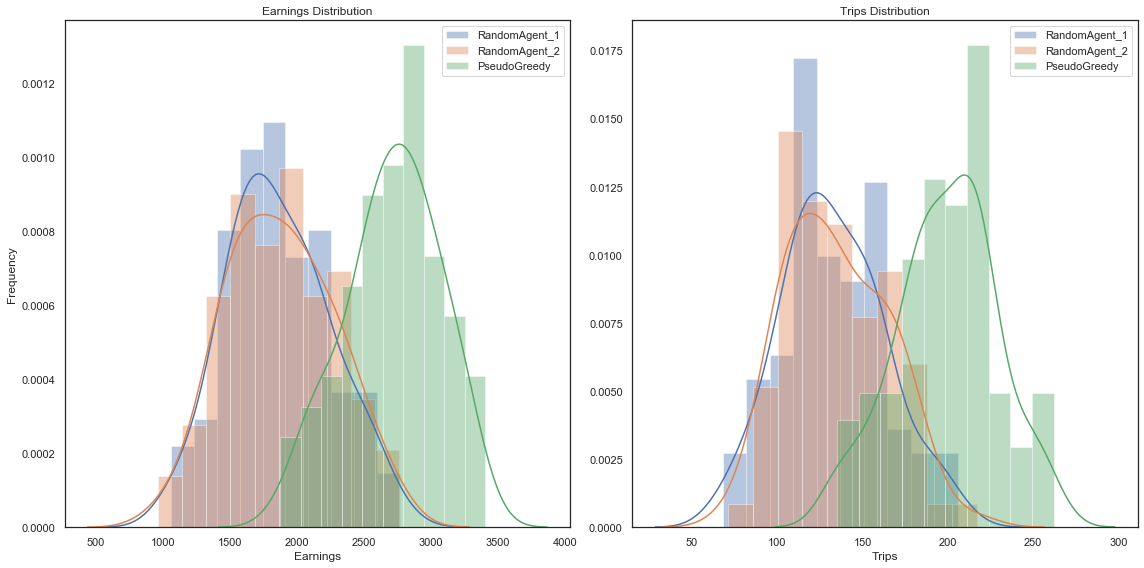

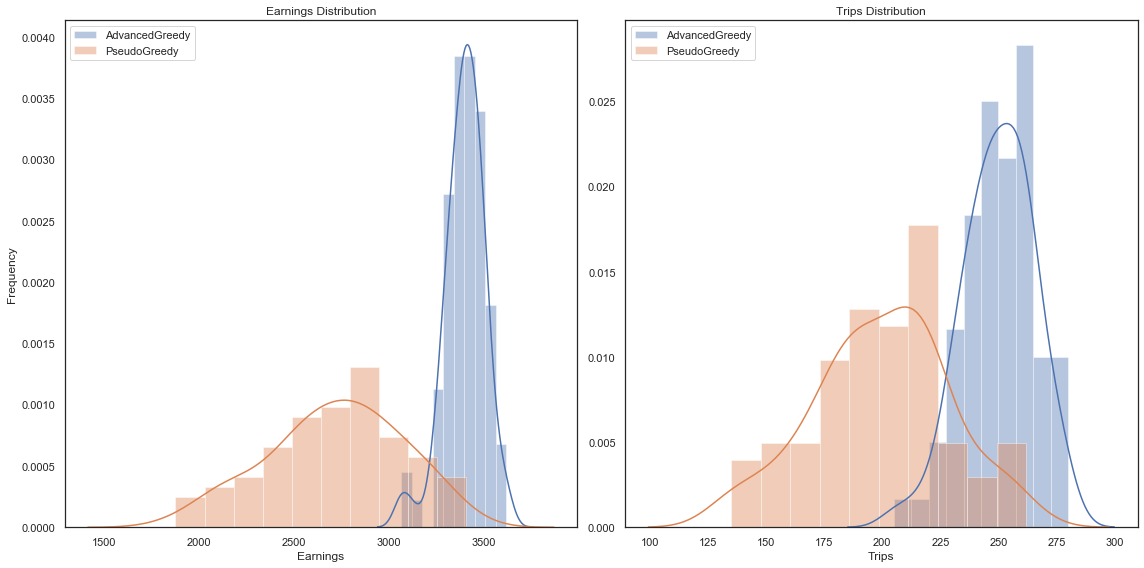

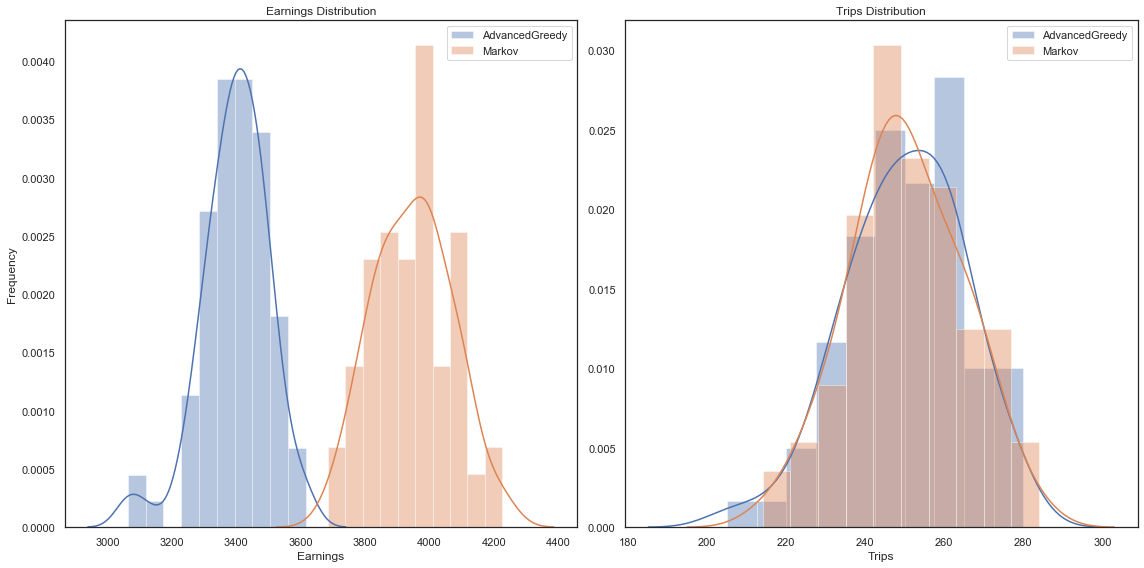

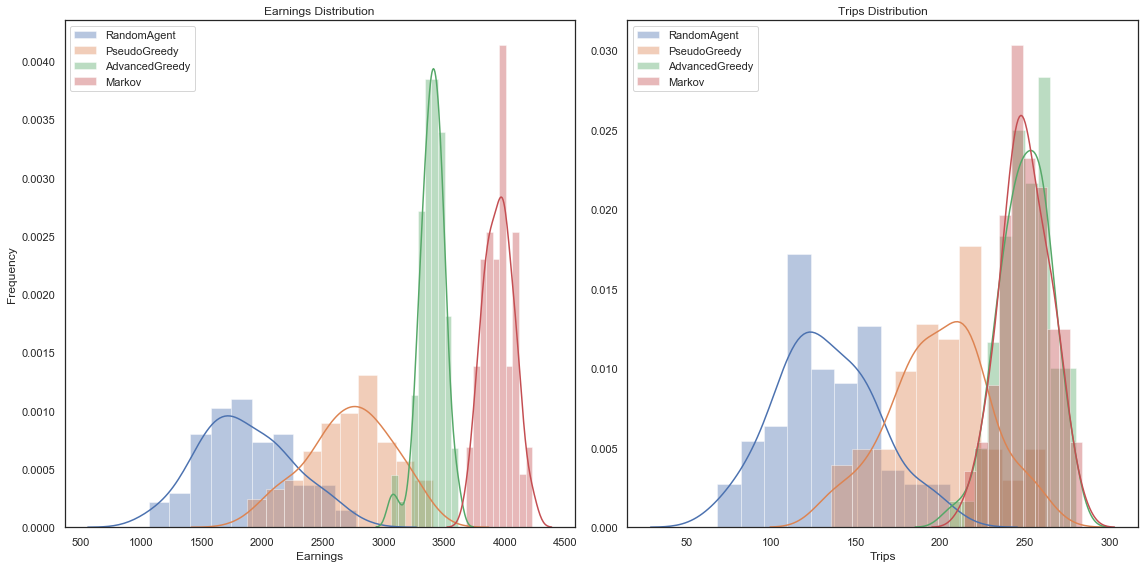

In [31]:
import seaborn as sns

player_name_map = {
    "RandomAgent":"RandomAgent",
    "PseudoGreedy":"PseudoGreedy",
    "AdvancedGreedy":"AdvancedGreedy",
    "AltMarkov30":"Markov",
    "RandomAgent_1":"RandomAgent_1",
    "RandomAgent_2":"RandomAgent_2"
}

for gametype, name in ((["RandomAgent_1","RandomAgent_2","PseudoGreedy"], "Baseline"),
                 (["AdvancedGreedy","PseudoGreedy"], "Greedy"),
                 (["AdvancedGreedy","AltMarkov30"], "Agents"),
                 (["RandomAgent", "PseudoGreedy", "AdvancedGreedy","AltMarkov30"], "AgentsV2")):
    # RandomAgent (without 1, 2, is simply Data in RandomAgent1)

    all_data = {}
    for player in gametype:
        games = [i for i in os.listdir('logs/' + player) if '.csv' in i]
        player_total = pd.DataFrame()
        
        if not games:
            print(f"No data found in: {player}")
            print()
            continue

        for game in games:
            df = pd.read_csv('./logs/' + player + f"/{game}")
            player_total = pd.concat([player_total, df])
        all_data[player] = player_total

    fig = plt.figure(figsize=(16, 8))
    for i, type in enumerate(("earnings", "trips")):
        ax = fig.add_subplot(1,2,i+1)
        for player, data in all_data.items():
            data = data[type]
            sns.distplot(data, label=player_name_map[player], ax=ax, bins=10)
        ax.legend()
        if not i:
            ax.set_ylabel("Frequency")
        ax.set_xlabel(type.title())
        ax.set_title(type.title() + " Distribution")

    fig.savefig(f"./plots/dist{name}.jpg")
    plt.tight_layout()
    plt.show()

from collections import defaultdict

# for our greedy and markov model players
for player in os.listdir('logs')[:2]:
    
    # get the game files with the full details
    games = [i for i in os.listdir('logs/' + player) if "trips" not in i or ".csv" not in i]
    
    # for each game playerd (1 - 25 iterations)
    for game in games:
        
        # initialize a counter for duration
        shifts = defaultdict(float)
        shift_time = defaultdict(float)
        with open(f"logs/{player}/" + game) as f:
            # keep rows that denote a pickup or end of shift
            week = [i for i in f.readlines() if "pickedup" in i or "End of Shift" in i or "starting" in i]
            
            # initialize shift count from 1 (up to the 6th weekly shift)
            shift_count = 1
            
            # for each row in the weekly simulation
            for minute in week:
                action = minute.split(",")
                
                if "starting" in action[1]:
                    start = pd.to_datetime(action[1].split()[-1])
                    
                # if end of shift, then we increase shift count to the next one (max of 6)
                elif "End of Shift" in action[1]:
                    end = pd.to_datetime(action[1].split()[-1])
                    shift_time[shift_count] += (end - start).seconds
                    shift_count += 1
                else:
                    # action[3:5] gives us the start time and end time of the pickup
                    times = action[3:5]
                    
                    # duration in seconds
                    duration = (pd.to_datetime(times[1]) - pd.to_datetime(times[0])).seconds
                    
                    # if the duration is greater than an hour, we should print it out to double check
                    if duration/60/60 > 1:
                        print(f"Long Trip in shift {shift_count} with time {duration/60/60:.3f} hours")
                    
                    # add it in to the counter
                    shifts[shift_count] += duration
                
        print()
        j = 1
        for i in shifts.items():
            print(f"[Game ID: {game.split('_')[1]}] Shift {i[0]} ({shift_time[j]/60/60:.3f} hours) has pickup time of {i[1]/60/60:.3f} hours")
            j += 1
                  
        print("**********************************************")
        

for player in os.listdir("logs")[:2]:
    avg_trips = defaultdict(list)
    games = [i for i in os.listdir('logs/' + player) if "trips" not in i or ".csv" not in i]
    for game in games:
        with open(f"logs/{player}/" + game) as f:

            week = [i for i in f.readlines() if "trips available in this cell" in i or "End of Shift" in i]
            shift_count = 1

            for minute in week:
                condition = True
                if "End of Shift" in minute.split(",")[1]:
                    shift_count += 1
                    continue
                action = minute.split(",")[2].split()[2]

                if action.isdigit():
                    avg_trips[shift_count].append(action)

        for k, v in avg_trips.items():
            print(f"[{player}] Shift {k} has an avg of {sum(int(i) for i in v)/len(v):.2f} trips each cell with a pickup")

        print("*************************************\n")